<a href="https://colab.research.google.com/github/HansErikLima/mandatory_assignment-2_machine_learning/blob/main/Machine_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDATG2208 - Mandatory Assignment - 2


In [14]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Exercise 1: Data Preparation

## Q1.1
Load the dataset, inspect feature names and target distribution. Comment on
dataset imbalance.

In [12]:
# Q1.1 - Load dataset and inspect features and target

# Load the Breast Cancer Wisconsin dataset
bc = load_breast_cancer()

# Convert to a DataFrame for easier inspection
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = pd.Series(bc.target, name="target")

# Show number of samples and features
print("Shape of dataset:", X.shape)

# Show feature names
print("\nFeature names:")
print(bc.feature_names)

# Show target values and class names
print("\nTarget class names:", bc.target_names)
print("Unique target values:", np.unique(y))

Shape of dataset: (569, 30)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target class names: ['malignant' 'benign']
Unique target values: [0 1]


In [10]:
# Q1.1 - Target distribution

class_counts = y.value_counts()
print("\nTarget distribution (counts):")
print(class_counts)

class_proportion = class_counts / len(y)
print("\nTarget distribution (proportion):")
print(class_proportion.round(4))


Target distribution (counts):
target
1    357
0    212
Name: count, dtype: int64

Target distribution (proportion):
target
1    0.6274
0    0.3726
Name: count, dtype: float64


### Q1.1 – Dataset Inspection and Target Distribution

The dataset contains 569 samples and 30 features.  
The features represent various measurements computed from breast tissue images.

By inspecting the target classes using `bc.target_names` and the unique values in `y`,  
we observe that the dataset uses two classes:
- 0 → malignant (cancerous)
- 1 → benign (non-cancerous)

The target distribution shows that benign cases are more frequent than malignant cases,  
indicating a moderate class imbalance. This is important to consider in later model evaluation.


## Q1.2
Analyze all features with and without standardization (i.e., zero mean and unit
variance). Plot the feature analysis with and without standardization and decide
which version is more suitable.

=== BEFORE standardization ===
                            mean       std
mean radius              14.1273    3.5210
mean texture             19.2896    4.2973
mean perimeter           91.9690   24.2776
mean area               654.8891  351.6048
mean smoothness           0.0964    0.0141
mean compactness          0.1043    0.0528
mean concavity            0.0888    0.0796
mean concave points       0.0489    0.0388
mean symmetry             0.1812    0.0274
mean fractal dimension    0.0628    0.0071

=== AFTER standardization ===
                        mean  std
mean radius             -0.0  1.0
mean texture            -0.0  1.0
mean perimeter          -0.0  1.0
mean area               -0.0  1.0
mean smoothness          0.0  1.0
mean compactness        -0.0  1.0
mean concavity          -0.0  1.0
mean concave points      0.0  1.0
mean symmetry           -0.0  1.0
mean fractal dimension  -0.0  1.0


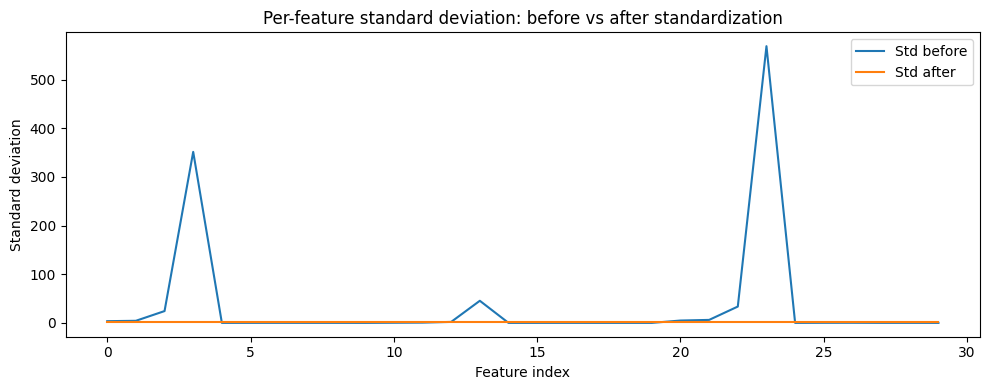

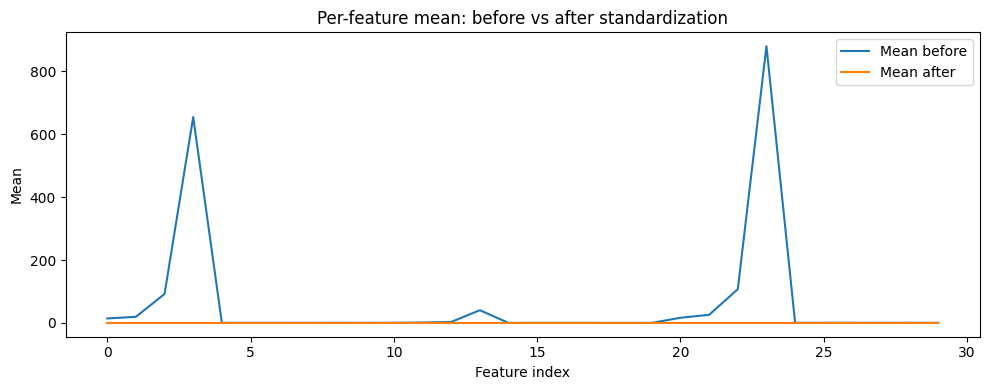

In [15]:
# Q1.2 - Analyze features with and without standardization

# 1) Summary BEFORE standardization
summary_before = pd.DataFrame({
    "mean": X.mean(),
    "std": X.std(ddof=0)
})

# 2) Standardize (zero mean, unit variance)
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3) Summary AFTER standardization
summary_after = pd.DataFrame({
    "mean": X_std.mean(),
    "std": X_std.std(ddof=0)
})

# 4) Show summaries
print("=== BEFORE standardization ===")
print(summary_before.round(4).head(10))  # show first 10 features for brevity

print("\n=== AFTER standardization ===")
print(summary_after.round(4).head(10))

# 5) Plot: per-feature standard deviation before vs after (simple line plots)
plt.figure(figsize=(10, 4))
plt.plot(summary_before["std"].values, label="Std before")
plt.plot(summary_after["std"].values, label="Std after")
plt.title("Per-feature standard deviation: before vs after standardization")
plt.xlabel("Feature index")
plt.ylabel("Standard deviation")
plt.legend()
plt.tight_layout()
plt.show()

# 6) (Optional) Plot: per-feature mean before vs after (to show centering effect)
plt.figure(figsize=(10, 4))
plt.plot(summary_before["mean"].values, label="Mean before")
plt.plot(summary_after["mean"].values, label="Mean after")
plt.title("Per-feature mean: before vs after standardization")
plt.xlabel("Feature index")
plt.ylabel("Mean")
plt.legend()
plt.tight_layout()
plt.show()

### Q1.2 — Feature analysis with and without standardization

**Summary.** I computed per-feature means and standard deviations before and after standardization (zero mean, unit variance).  
Before standardization, features are on very different scales. For instance, `mean area` has std ≈ 351.60, while `mean smoothness` has std ≈ 0.0141. After standardization, all features are centered near 0 and have std ≈ 1.0

**Interpretation of the plots.**  
The standard deviation plot shows large spikes before scaling that collapse to ≈ 1 after scaling.  
The mean plot shows that feature means shift to values close to 0 after scaling.

**Conclusion.** The standardized representation is more suitable for scale-sensitive models. I will use standardized features in later modeling steps.


## Q.1.3
Comment on importance of three way split with respect to hyperparameter search
and robustness of any learned model.

### Q1.3 — Why a three-way split (train, validation, test)

A three-way split helps with fair model selection and a trustworthy final result.
The train set is used to fit models, for example inside 5-fold cross-validation.
The validation set is used to compare models and tune hyperparameters while the test set stays unseen.
The test set is used once at the very end to report the final performance.

This limits overfitting to a single split, since cross-validation gives an average and a spread across folds.
Keep the class ratio similar in each split by using stratified splits.
If I standardize features, I fit the scaler on the training data and apply the same transform to validation and test to avoid data leakage.

